# U.S. Medical Insurance

This project explores factors that influence medical insurance charges in the United States using exploratory data analysis in Python.


## 1. Business Context
Health insurance providers must accurately price risk to remain profitable while maintaining fair premiums. Understanding which customer attributes drive medical costs is critical for underwriting, pricing strategy, and risk segmentation.

This analysis explores individual-level insurance cost drivers to identify variables with strong explanatory power and potential interaction effects that could inform pricing models and risk classification.

## 2. Project Scope

The goal of this project is to analyze U.S. medical insurance cost data to identify key factors influencing insurance charges.

Key questions explored:
- How does smoking status affect insurance costs?
- What is the relationship between BMI and insurance charges?
- How do insurance costs vary by age?

## 3. Dataset
The dataset contains individual-level U.S. medical insurance records with the following variables:
- age: age of the individual
- sex: gender
- bmi: body mass index
- children: number of dependents
- smoker: smoking status
- region: residential region in the U.S.
- charges: medical insurance cost

### Initial Data Overview

We begin by loading the dataset and reviewing its basic structure to understand
the available variables and the format of the data.


In [1]:
import pandas as pd
df = pd.read_csv("data/insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Structure and Types

Next, we examine data types and summary statistics to confirm the dataset structure before running data quality checks.


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 4. Data Quality Check

Before conducting deeper analysis, we assess the dataset for potential data quality issues, including missing values, duplicate records, and abnormal cardinality in categorical variables.

This step ensures that observed patterns in later analysis are not driven by data errors or structural issues.


In [3]:
df.isna().sum()          # Missing


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.nunique()            # Cardinality


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [5]:
df.duplicated().sum()   # Duplicate rows


np.int64(1)

In [6]:
df[df.duplicated(keep=False)].sort_values(list(df.columns))


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


### Summary of Data Quality Checks

The dataset was assessed for common data quality issues prior to analysis.

- No missing values were detected across all variables.
- Categorical variables show reasonable cardinality (e.g., sex, smoker, region), suggesting no obvious encoding issues (e.g., unexpected extra categories).
- One fully duplicated record was identified.

Because each row represents an individual insurance record and no unique identifier is available, the duplicated observation was removed to prevent double-counting and bias in subsequent analysis.


### Duplicate Handling

The duplicated record was removed to ensure each observation represents a unique individual and to avoid bias in aggregate statistics.
All subsequent analyses are conducted on the deduplicated dataset (n = 1,337).

In [27]:
df = df.drop_duplicates()

# Verify removal
df.duplicated().sum()


np.int64(0)

## 5. Univariate Analysis

In this section, we examine the distribution and basic characteristics of each variable individually.
The objective is to understand the range, central tendency, variability, and overall shape of the data before exploring relationships between variables.

Univariate analysis helps identify:
- Skewness or extreme values in numerical variables
- Imbalanced or unexpected distributions in categorical variables
- Potential data transformations needed for deeper analysis

The analysis is conducted separately for numerical and categorical features.


### 5.1. Numerical Variables Analysis

This section examines the distribution and key statistical properties of numerical variables, including age, BMI, number of children, and insurance charges.

For each variable, we assess:
- Central tendency (mean, median)
- Dispersion (range, interquartile range)
- Distribution shape and skewness
- Presence of potential outliers

Understanding these characteristics helps identify abnormal patterns and informs subsequent bivariate and multivariate analysis.


In [8]:
num_cols = ["age", "bmi", "children", "charges"]


In [9]:
display(df[num_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [10]:
df[num_cols].skew()


age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

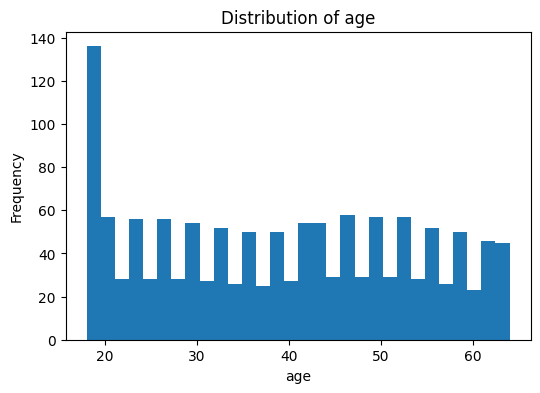

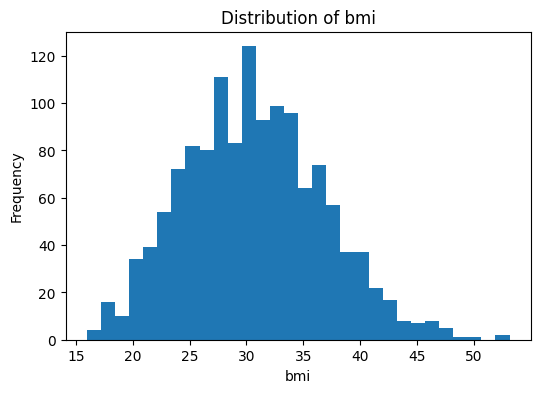

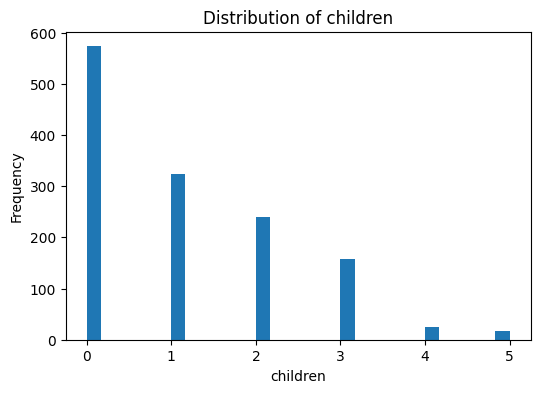

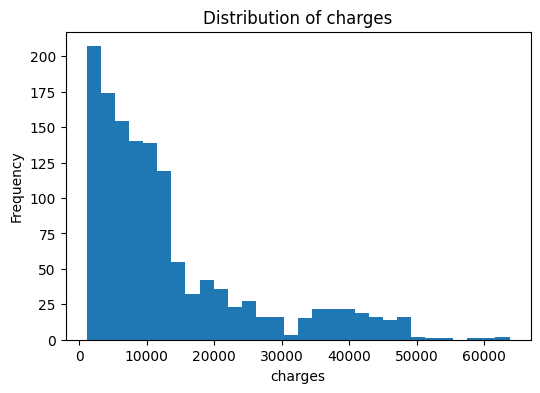

In [11]:
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


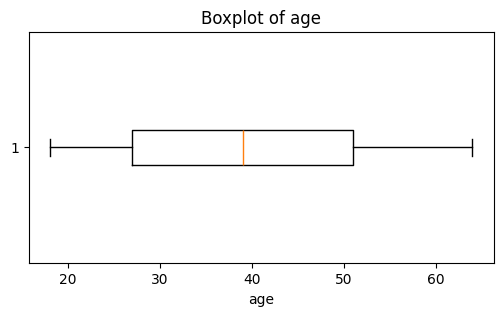

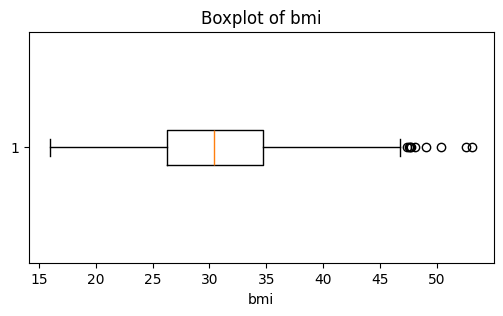

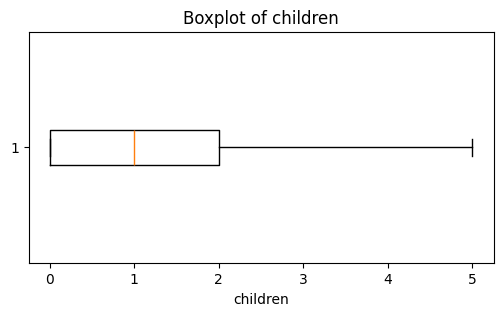

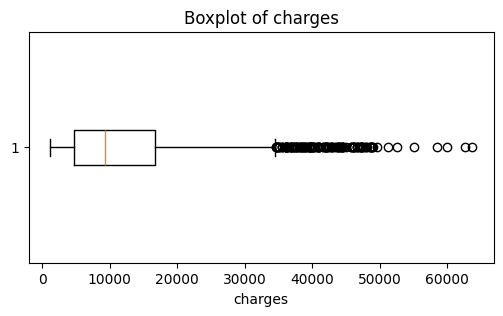

In [12]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


### Key Observations from Numerical Variables

- **Age** is broadly distributed across the adult range (18–64), with no strong concentration in narrow age bands, enabling exploratory age-based comparisons within this sample.

- **BMI** values are moderately right-skewed and centered around the overweight–obese threshold (median ≈ 30.4; mean ≈ 30.7), with a small number of high-BMI outliers. This indicates that a meaningful subset of individuals falls in the obese range, and extreme BMI values may disproportionately influence mean-based summaries.

- **Number of children**, while numeric in format, behaves as a discrete variable. The distribution is right-skewed, with most individuals having 0–2 children. Households with 4 or more children are rare and may contribute limited statistical power in subgroup analyses.

- **Insurance charges** show strong right skewness with a long tail and numerous high-cost outliers. This indicates that a small subset of individuals incurs disproportionately high medical expenses, making the mean sensitive to extreme values.

Overall, these patterns suggest that **median-based comparisons**, robust statistics, and segmentation by key risk factors (e.g. smoking status, BMI category) may be more appropriate than relying solely on mean values in subsequent analyses.


### 5.2. Categorical Variables Analysis

This section examines the distribution and balance of categorical variables, including sex, smoking status, region, and selected discrete features. The objective is to understand group composition, detect potential class imbalance, and identify categories that may meaningfully differentiate insurance charges.

For each categorical variable, we assess:
- Category frequencies and proportions
- Presence of dominant or underrepresented groups
- Potential analytical relevance for downstream comparisons

Understanding these distributions provides essential context for interpreting group-level differences in subsequent bivariate and multivariate analyses.


In [13]:
cat_cols = ["sex", "smoker", "region"]

for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

    print(f"\nProportion for {col}:")
    print(df[col].value_counts(normalize=True).round(3))


Value counts for sex:
sex
male      675
female    662
Name: count, dtype: int64

Proportion for sex:
sex
male      0.505
female    0.495
Name: proportion, dtype: float64

Value counts for smoker:
smoker
no     1063
yes     274
Name: count, dtype: int64

Proportion for smoker:
smoker
no     0.795
yes    0.205
Name: proportion, dtype: float64

Value counts for region:
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

Proportion for region:
region
southeast    0.272
southwest    0.243
northwest    0.242
northeast    0.242
Name: proportion, dtype: float64


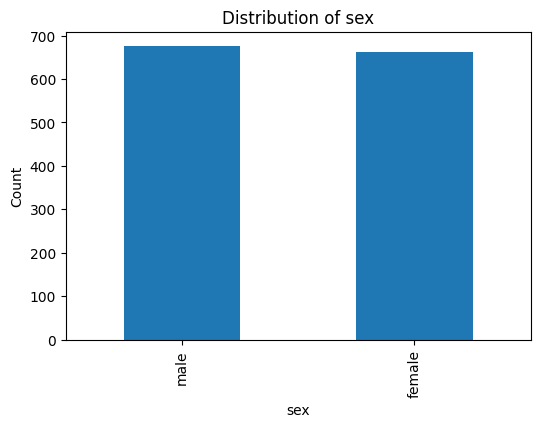

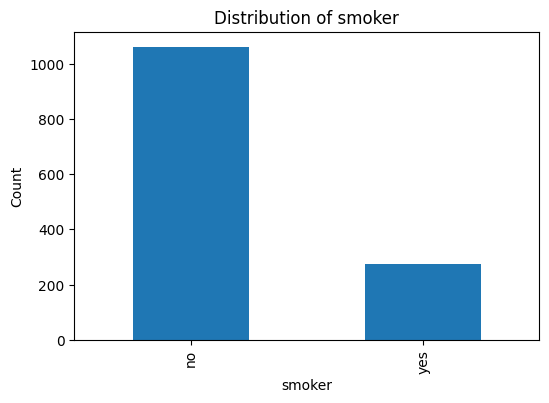

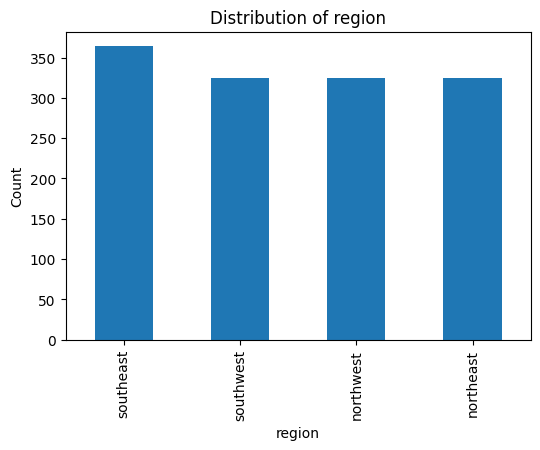

In [14]:
import matplotlib.pyplot as plt

for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


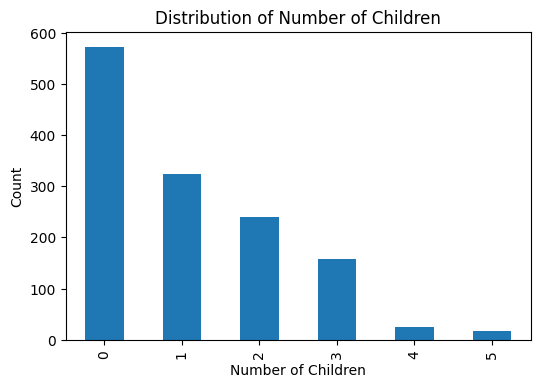

In [15]:
plt.figure(figsize=(6,4))
df["children"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.show()


### Key Observations from Categorical Variables

- **Sex** is almost perfectly balanced in the dataset, with males accounting for approximately 50.5% and females 49.5% of observations.  
  This balance reduces the risk of gender-driven sampling bias in subsequent analyses.

- **Smoking status** is notably imbalanced, with a clear majority of non-smokers (≈79.5%) compared to smokers (≈20.5%).  
  This imbalance suggests smoking is a minority behavior in the sample but potentially a strong differentiating factor, warranting focused comparison in later analyses.

- **Region** is relatively evenly distributed across the four geographic categories (southeast, southwest, northwest, northeast), each representing roughly 24–27% of the dataset.  
  This even regional spread supports fair regional comparisons without the need for reweighting or adjustment.

- **Number of children**, while numeric in form, behaves as a discrete categorical variable. Most individuals have 0–2 children, with frequency declining sharply for larger family sizes.  
  Categories with 4 or 5 children represent a very small proportion and may contribute limited statistical power in subgroup analyses.

Overall, the categorical variables exhibit either balanced distributions (sex, region) or meaningful real-world imbalance (smoker status, number of children), providing useful segmentation dimensions for subsequent bivariate and multivariate analysis.


## 6. Bivariate Analysis

In this phase, we examine the relationships between pairs of variables to understand how individual features interact with each other, particularly in relation to insurance charges.

The primary objective of bivariate analysis is to identify meaningful associations, group-level differences, and potential explanatory variables that may influence insurance costs.

This analysis focuses on:
- Comparing insurance charges across categorical groups (e.g. smoker status, sex, region)
- Exploring relationships between numerical variables and charges
- Identifying variables that show strong separation or trends, which may be influential predictors in later modeling

Both visual and statistical comparisons are used to support interpretation and ensure patterns are not driven by random variation.


### Relationship 1: Insurance Charges by Smoking Status

### Description  
This section examines the relationship between **smoking status** and **insurance charges** to assess whether smokers incur systematically higher medical costs compared to non-smokers.

Smoking is a well-established health risk factor and is expected to be a strong differentiator in insurance pricing. This analysis evaluates both **distributional differences** and **central tendency** of charges across smoker groups.

Specifically, we focus on:
- Comparing the distribution of insurance charges between smokers and non-smokers  
- Assessing differences in median and spread, given the presence of skewness and outliers  
- Identifying whether smoking status creates clear separation in cost profiles  


<Figure size 700x500 with 0 Axes>

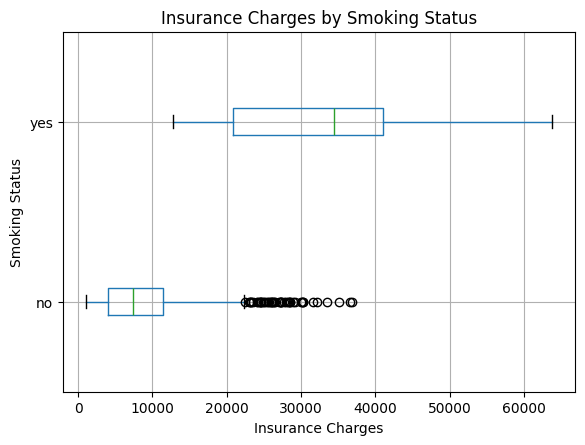

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
df.boxplot(column="charges", by="smoker", vert=False)
plt.title("Insurance Charges by Smoking Status")
plt.suptitle("")  # remove automatic subtitle
plt.xlabel("Insurance Charges")
plt.ylabel("Smoking Status")
plt.show()

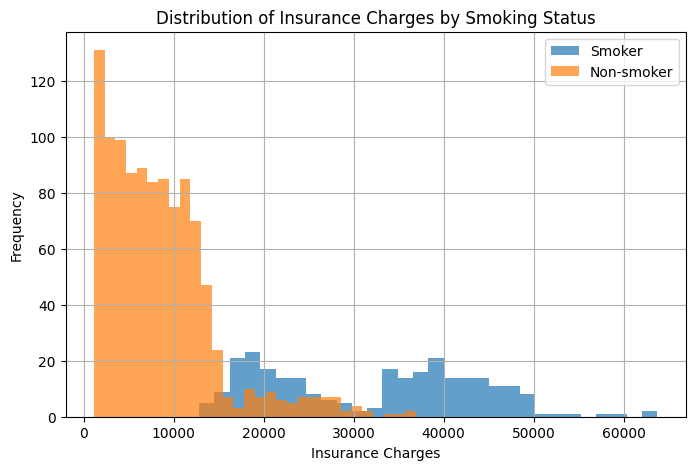

In [17]:
plt.figure(figsize=(8,5))

df[df["smoker"] == "yes"]["charges"].hist(bins=30, alpha=0.7, label="Smoker")
df[df["smoker"] == "no"]["charges"].hist(bins=30, alpha=0.7, label="Non-smoker")

plt.title("Distribution of Insurance Charges by Smoking Status")
plt.xlabel("Insurance Charges")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [18]:
df.groupby("smoker")["charges"].describe()


,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1063.0,8440.660307,5992.973800,1121.8739,3988.883500,7345.72660,11363.019100,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


### Key Observations: Insurance Charges by Smoking Status

- **Smoking status creates a very strong separation in insurance charges.**  
  The distributions show strong separation between smokers and non-smokers, although limited overlap remains at the lower tail of smoker charges and the upper tail of non-smoker charges, indicating that smoking status is a dominant differentiating factor in medical costs.

- **Smokers incur substantially higher insurance charges than non-smokers.**  
  - Median charges for smokers (≈34,456) are more than **4.5× higher** than for non-smokers (≈7,346).  
  - Mean charges for smokers (≈32,050) are nearly **4× higher** than non-smokers (≈8,441), reflecting both higher baseline costs and extreme high-cost cases.

- **Distributional shapes differ markedly between the two groups.**  
  - Non-smokers’ charges are concentrated at lower values, with a long but relatively thin right tail.  
  - Smokers exhibit a much wider spread and a heavy right tail, with charges extending beyond 60,000, indicating frequent high-cost cases.

- **Outliers exist in both groups but are far more extreme among smokers.**  
  While non-smokers show some high-cost outliers, smokers dominate the upper end of the distribution, substantially inflating the mean.

- **Median-based comparisons are more appropriate than mean-based comparisons.**  
  Given the strong right skewness and presence of extreme outliers—particularly among smokers—the median provides a more robust summary of typical insurance costs.

### Interpretation

Smoking status is not merely associated with higher insurance charges; it appears to be one of the **strongest explanatory variables** in the dataset. The clear separation between smokers and non-smokers suggests that smoking-related health risks translate directly into substantially higher medical expenses.

### Implications for Subsequent Analysis

- Smoking status should be treated as a **key segmentation variable** in subsequent analyses.  
- Interaction effects (e.g. smoking × BMI, smoking × age) are likely to be important and warrant further investigation.  
- Later modeling should account for skewness and heteroskedasticity, especially within the smoker subgroup.


### Relationship 2: Insurance Charges by BMI

### Description
This section examines the relationship between **Body Mass Index (BMI)** and **insurance charges** to assess whether higher BMI levels are associated with increased medical costs.

BMI is a widely used proxy for body fat and is clinically linked to higher risks of chronic conditions such as cardiovascular disease, diabetes, and hypertension. As a result, BMI is expected to exhibit a positive association with insurance charges, potentially in a non-linear manner.

This analysis focuses on:
- Exploring the overall trend between BMI and insurance charges
- Identifying whether higher BMI values are associated with disproportionately higher costs
- Assessing the presence of outliers and non-linear patterns that may affect mean-based interpretations


In [19]:
corr_overall = df[["bmi", "charges"]].corr().loc["bmi", "charges"]
corr_by_smoker = (
    df.groupby("smoker")[["bmi", "charges"]]
      .corr()
      .loc[(slice(None), "bmi"), "charges"]
      .reset_index()
)

corr_by_smoker.columns = ["smoker", "var", "corr_bmi_charges"]

corr_summary = pd.DataFrame({
    "segment": ["overall"] + corr_by_smoker["smoker"].tolist(),
    "corr(bmi, charges)": [corr_overall] + corr_by_smoker["corr_bmi_charges"].tolist()
})

corr_summary

,segment,"corr(bmi, charges)"
0,overall,0.198401
1,no,0.084077
2,yes,0.806481


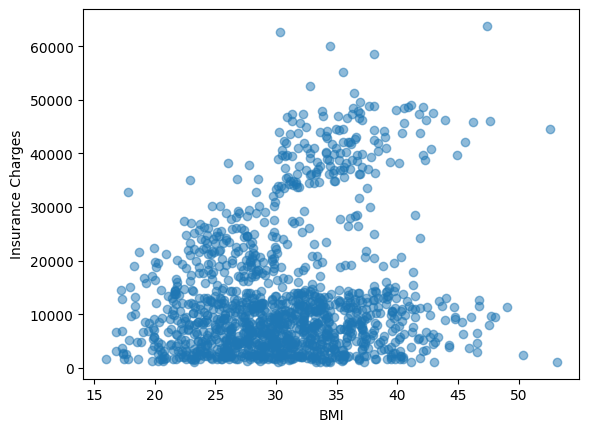

In [20]:
plt.figure()
plt.scatter(df["bmi"], df["charges"], alpha=0.5)
plt.xlabel("BMI")
plt.ylabel("Insurance Charges")
plt.show()

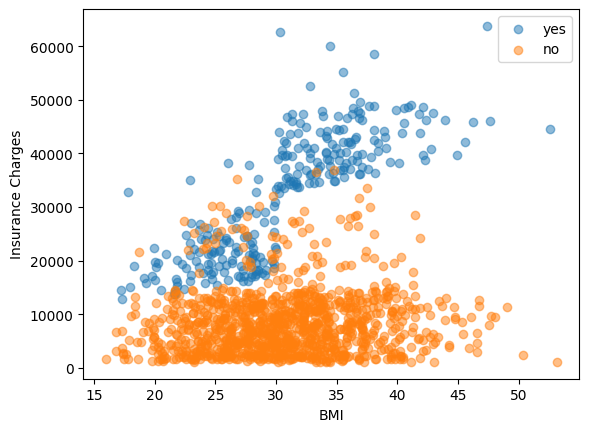

In [21]:
plt.figure()
for status in df["smoker"].unique():
    subset = df[df["smoker"] == status]
    plt.scatter(subset["bmi"], subset["charges"], alpha=0.5, label=status)

plt.xlabel("BMI")
plt.ylabel("Insurance Charges")
plt.legend()
plt.show()



### Key Observations

- **BMI shows a weak positive association with insurance charges at the aggregate level.**  
  The overall correlation between BMI and charges is modest (≈ 0.20), indicating that BMI alone explains only a small portion of the variation in medical costs. Charges remain widely dispersed across the BMI range, particularly at lower cost levels.

- **The relationship between BMI and charges differs substantially by smoking status.**  
  While the aggregate trend appears weak, stratification by smoking status reveals markedly different patterns between smokers and non-smokers.

- **Among non-smokers, BMI has minimal association with insurance charges.**  
  The correlation is very low (≈ 0.08), and insurance charges remain relatively stable across BMI values, suggesting limited cost escalation attributable to BMI alone in this group.

- **Among smokers, BMI is strongly associated with higher insurance charges.**  
  The correlation is strong and positive (≈ 0.81), with charges increasing sharply as BMI rises. High-cost observations are concentrated almost entirely among smokers with higher BMI.

- **High-cost outliers are primarily driven by the smoker–high BMI combination.**  
  While outliers exist across the dataset, the most extreme insurance charges are observed among smokers, particularly at higher BMI levels, substantially inflating the overall variance.

### Interpretation

BMI is not a dominant cost driver on its own, as evidenced by the weak overall association with insurance charges.  
However, when combined with smoking status, BMI becomes highly informative. The strong separation within the smoker subgroup suggests a potential interaction/effect modification; this should be tested in a regression model (e.g., BMI×smoker).

### Implications for Subsequent Analysis

- BMI should not be interpreted independently of smoking status in explanatory or predictive analyses.
- Interaction terms (e.g., BMI × smoker) are likely to be critical in downstream modeling.
- Aggregate correlations may obscure meaningful subgroup dynamics; segmentation is essential.
- Future models should account for non-linearity, heteroskedasticity, and the disproportionate influence of high-cost smoker observations.


### Relationship 3: Insurance Charges by Age

### Description

This section examines the relationship between **age** and **insurance charges** to understand how medical costs evolve across different stages of life.

Age is a fundamental demographic variable that is closely linked to health risk accumulation, the prevalence of chronic conditions, and healthcare utilization. As individuals age, medical expenses are generally expected to increase, potentially in a non-linear manner and with substantial variation across subgroups.

This analysis focuses on:

- Exploring the overall relationship between age and insurance charges  
- Identifying whether insurance costs increase steadily or accelerate at older ages  
- Assessing the presence of outliers and distributional differences that may affect mean-based interpretations  
- Evaluating whether age interacts with other key factors (e.g., smoking status) observed in previous relationships


In [22]:
corr_overall = df[["age", "charges"]].corr().loc["age", "charges"]

corr_by_smoker = (
    df.groupby("smoker")[["age", "charges"]]
      .corr()
      .loc[(slice(None), "age"), "charges"]
      .reset_index()
)

corr_by_smoker.columns = ["smoker", "var", "corr_age_charges"]

corr_summary = pd.DataFrame({
    "segment": ["overall"] + corr_by_smoker["smoker"].tolist(),
    "corr(age, charges)": [corr_overall] + corr_by_smoker["corr_age_charges"].tolist()
})

corr_summary

,segment,"corr(age, charges)"
0,overall,0.298308
1,no,0.627400
2,yes,0.368224


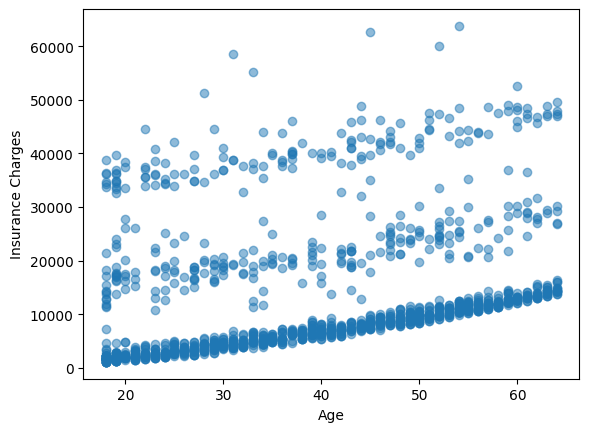

In [23]:
plt.figure()
plt.scatter(df["age"], df["charges"], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Insurance Charges")
plt.show()

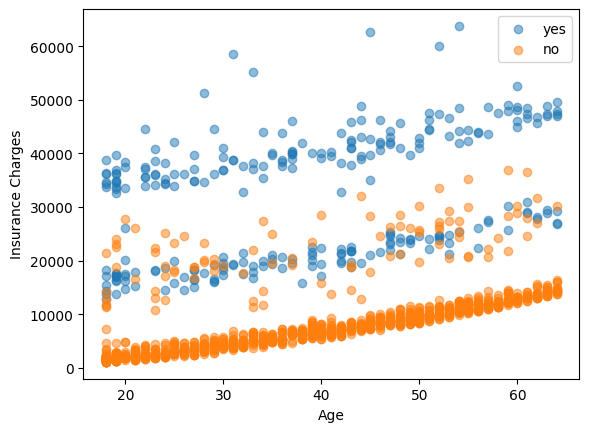

In [24]:
plt.figure()

for status in df["smoker"].unique():
    subset = df[df["smoker"] == status]
    plt.scatter(subset["age"], subset["charges"], alpha=0.5, label=status)

plt.xlabel("Age")
plt.ylabel("Insurance Charges")
plt.legend()
plt.show()

### Key Observations

- **Age shows a moderate positive relationship with insurance charges at the aggregate level.**  
  The overall correlation between age and charges is moderate (≈ 0.30), indicating that insurance costs generally increase as individuals get older, though with substantial variability.

- **The relationship between age and insurance charges differs by smoking status.**  
  Stratifying by smoking status reveals distinct cost trajectories across age groups, suggesting that age does not operate uniformly across the population.

- **Among non-smokers, age is strongly associated with higher insurance charges.**  
  The correlation is relatively high (≈ 0.63), and charges increase steadily with age, forming a clear upward trend. This indicates that age-related health risks translate into gradually increasing medical costs for non-smokers.

- **Among smokers, the association between age and charges is weaker but remains positive.**  
  Although insurance charges are consistently higher for smokers at all ages, the correlation with age is lower (≈ 0.37). This suggests that smoking-related costs dominate overall expenditure, partially overshadowing the incremental effect of aging.

- **Distinct cost bands and outliers are visible across age groups.**  
  The scatter plots show clear vertical separation between smoker and non-smoker groups, as well as increasing spread and high-cost outliers at older ages, particularly among smokers.

### Interpretation

Age is an important explanatory variable for insurance charges, particularly among non-smokers, where costs increase in a relatively stable and predictable manner over time.  
However, for smokers, elevated baseline costs appear early and persist across ages, reducing the relative importance of age compared to smoking status itself. This pattern reinforces the role of smoking as a dominant cost driver, with age acting as a secondary but still meaningful factor.

### Implications for Subsequent Analysis

- Age should be included as a core continuous predictor in downstream models.
- The differing age–cost relationships across smoking status suggest that interaction terms (e.g., age × smoker) may improve model performance.
- Mean-based summaries may be influenced by high-cost older individuals; robust metrics or transformations may be required.
- Segment-level analysis remains critical to avoid masking distinct behavioral patterns across subgroups.


### Relationship 4: Insurance Charges by Number of Children

### Description

This section examines the relationship between the **number of children** and **insurance charges** to assess whether family size is associated with differences in medical costs.

The number of children is a household-level variable that may influence insurance expenses through factors such as family healthcare utilization, dependents’ medical needs, and plan coverage structure. However, unlike age or smoking status, its relationship with insurance charges is less direct and may be weaker or non-linear.

This analysis focuses on:

- Exploring whether insurance charges vary systematically with the number of children  
- Identifying patterns or thresholds where costs may increase or remain stable  
- Assessing the extent of variability and overlap across different family sizes  
- Evaluating whether the number of children acts as a primary driver or a secondary contextual factor compared to previously analyzed variables


In [25]:
children_summary = (
    df.groupby("children")["charges"]
      .agg(
          count="count",
          mean="mean",
          median="median"
      )
      .reset_index()
)

children_summary

,children,count,mean,median
0,0,573,12384.695344,9863.47180
1,1,324,12731.171832,8483.87015
2,2,240,15073.563734,9264.97915
3,3,157,15355.318367,10600.54830
4,4,25,13850.656311,11033.66170
5,5,18,8786.035247,8589.56505


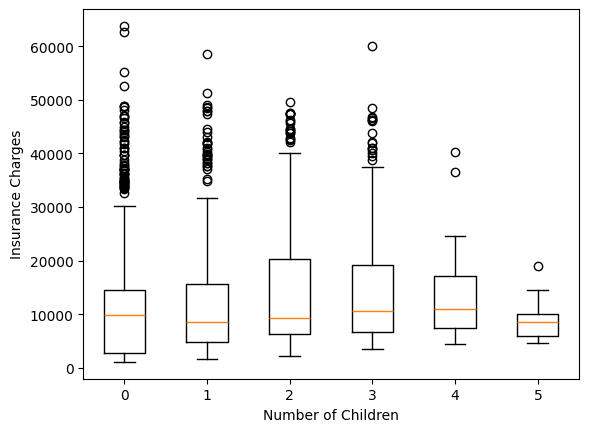

In [26]:
plt.figure()
plt.boxplot(
    [df[df["children"] == c]["charges"] for c in sorted(df["children"].unique())],
    tick_labels=sorted(df["children"].unique())
)
plt.xlabel("Number of Children")
plt.ylabel("Insurance Charges")
plt.show()

### Key Observations

- **Insurance charges do not increase monotonically with the number of children.**  
  Both the summary table and the boxplot show no clear upward trend in either mean or median charges as the number of children increases. Median insurance costs fluctuate across groups rather than rising consistently.

- **Median charges remain relatively stable across most family sizes.**  
  For households with 0 to 4 children, median charges cluster within a narrow range, suggesting that the typical insurance cost is broadly similar regardless of family size.

- **Households with five children show lower average and median charges, but sample size is very small.**  
  The group with five children has noticeably lower mean and median charges; however, this group contains very few observations, making the estimates unstable and likely not representative.

- **Substantial overlap exists across all groups.**  
  The boxplot reveals heavy overlap in the interquartile ranges and whiskers for different numbers of children, indicating weak separation between groups.

- **High-cost outliers appear across all family sizes.**  
  Extreme insurance charges are present in every group, suggesting that high medical costs are driven by other factors rather than the number of children itself.

### Interpretation

The number of children does not appear to be a strong or consistent driver of insurance charges. Unlike age, BMI, or smoking status, family size shows limited explanatory power and does not meaningfully differentiate insurance costs at the individual level. Observed differences across groups are small relative to within-group variability.

### Takeaways for This Relationship

- The number of children should be treated as a **secondary or control variable** rather than a primary predictor.
- Mean-based comparisons may be misleading due to skewness and outliers; median values provide a more robust summary.
- Modeling efforts should prioritize variables with stronger and more consistent relationships to insurance charges, while retaining the number of children primarily for adjustment purposes.


## 7. Synthesis of Key Relationships

### Summary of Findings

The exploratory analysis identifies a small set of variables that explain insurance charges with clearly differentiated levels of influence. While several factors are associated with medical costs, their explanatory strength varies substantially across variables and population segments.

- **Smoking status** emerges as the most dominant explanatory variable. It creates a strong and consistent separation in insurance charges, with smokers incurring substantially higher costs than non-smokers across all other dimensions.
- **Age** shows a meaningful positive relationship / generally increasing trend with insurance charges. Costs tend to increase with age, particularly among non-smokers, while smoking introduces a high baseline that partially obscures age-related increases.
- **Body Mass Index (BMI)** exhibits a weak association with insurance charges at the aggregate level, but becomes highly informative when analyzed jointly with smoking status. Elevated BMI substantially amplifies insurance costs among smokers, indicating a strong interaction effect.
- **Number of children** demonstrates limited explanatory power. Insurance charges do not increase systematically with family size, and observed differences across groups are small relative to within-group variability.

### Relative Importance of Variables

Based on the strength, consistency, and interpretability of the observed relationships, the variables can be qualitatively ranked as follows:

1. **Smoking status** — dominant cost driver  
2. **Age** — strong structural driver  
3. **BMI** — conditional driver (interaction-dependent)  
4. **Number of children** — weak control variable  

### Key Patterns and Interactions

- Aggregate relationships often mask important subgroup dynamics. Both age and BMI display substantially different cost patterns once smoking status is taken into account.
- High insurance charges are disproportionately concentrated among smokers, particularly those with higher BMI and older age, resulting in strong right skewness and heteroskedasticity in the cost distribution.
- Mean-based summaries are sensitive to extreme values; median-based comparisons provide a more robust representation of typical insurance costs.

### Implications for Subsequent Analysis

Findings from the bivariate exploratory analysis suggest that downstream modeling should:

- Treat smoking status as a core segmentation variable.
- Include age as a primary continuous predictor.
- Explicitly model interaction effects involving smoking status (e.g., smoking × BMI, smoking × age).
- Account for skewness and extreme values through appropriate transformations or robust modeling approaches.
- Retain the number of children primarily as a control variable rather than a primary driver.

This synthesis completes the exploratory relationship analysis and provides a clear, evidence-based foundation for subsequent modeling and inference.


## 8. Analytical Recommendations (Pricing & Modeling Implications)

Based on the observed relationships, the following recommendations translate the EDA findings into actionable implications for pricing and downstream modeling:

1) Treat **smoking status** as a primary segmentation variable  
- Smoking creates the clearest separation in charges and should be modeled explicitly (e.g., as a key categorical driver and/or used for stratified modeling).

2) Do not interpret **BMI** independently of smoking  
- Aggregate BMI–charges correlation is weak, but within smokers it becomes strongly predictive.  
- Include an interaction term (**BMI × smoker**) or model smokers and non-smokers separately.

3) Include **age** as a core continuous predictor with potential interaction  
- Age shows a meaningful upward cost trend, especially among non-smokers.  
- Consider an interaction term (**age × smoker**) to capture different age-cost trajectories by smoking status.

4) Treat **number of children** as a secondary control feature  
- Charges do not increase consistently with family size and show heavy overlap across groups.  
- Keep it primarily for adjustment rather than as a primary driver.

5) Use robust summaries and/or transformations for skewed costs  
- Charges are heavily right-skewed with extreme outliers.  
- Median-based comparisons and log-transformed targets (e.g., log(charges)) are likely more stable for modeling.


## 9. Limitations & Next Steps

### Limitations
- This dataset is cross-sectional and observational; relationships identified here are associative and do not establish causality.
- Key clinical and plan-level variables (e.g., pre-existing conditions, claims history, coverage details, deductible/copay) are not available, which may explain residual variance in charges.
- Charges exhibit strong right-skewness and heteroskedasticity, meaning mean-based interpretations can be sensitive to high-cost outliers.

### Next Steps (Optional Extensions)
1) **Modeling for explanation**
- Fit a baseline linear regression (or GLM) with key predictors: age, BMI, smoker, children, sex, region.
- Add interaction terms: **smoker × BMI** and **smoker × age**.
- Evaluate residual patterns to confirm heteroskedasticity and consider robust regression.

2) **Target transformation**
- Model **log(charges)** to reduce skewness and stabilize variance; compare performance and interpretability.

3) **Non-linearity checks**
- Test splines/polynomial terms for age and BMI, or use tree-based models to capture non-linear relationships while checking feature effects.

4) **Segmented analysis**
- Build separate models for smokers vs non-smokers to improve interpretability and reduce interaction complexity.
